# Car Dekho Used Car Prediction

### Life Cycle of Data Science Project




*   Understanding the problem statement
*   Data Collection
*   EDA
*   Data Cleaning
*   Data Pre Processing
*   Model Training
*   Choose Best Model



## 1. Problem Statement



*   This dataset comprises used cars sold on cardehko.com in India as well as important features of these cars.
*   If user can predict the price of the car based on input features.
*   Prediction results can be used to give new seller the price suggestion based on market condition.



## 2. Data Collection



*   The Dataset is collected from scrapping from cardheko.com
*   The data consists of 13 column and 15411 rows.



### 2.1 Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

%matplotlib inline

#### **Importing Dataset**

In [2]:
df = pd.read_csv('cardekho_dataset.csv', index_col = [0])

In [3]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [5]:
df.shape

(15411, 13)

In [6]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


## 3. Exploring Data

In [8]:
# Defining Numerical and Categorical Features

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print(f'We have {len(numerical_features)} numerical features : {numerical_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Feature Information



*   **car_name**: Car's Full name, which includes brand and specific model name.
*  **brand**: Brand Name of the particular car.
*  **model**: Exact model name of the car of a particular brand.
*  **seller_type**: Which Type of seller is selling the used car
*  **fuel_type**: Fuel used in the used car, which was put up on sale.
*  **transmission_type**: Transmission used in the used car, which was put on sale.
*  **vehicle_age**: The count of years since car was bought.
*  **mileage**: It is the number of kilometer the car runs per litre.
*  **engine**: It is the engine capacity in cc(cubic centimeters)
*  **max_power**: Max power it produces in BHP.
*  **seats**: Total number of seats in car.
*  **selling_price**: The sale price which was put up on website.




In [9]:
# proportion of count data on categorical features
for col in categorical_features:
  print(df[col].value_counts(normalize = True)* 100)
  print('-------------------------------------------')

Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64
-------------------------------------------
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mini

### Numerical Features

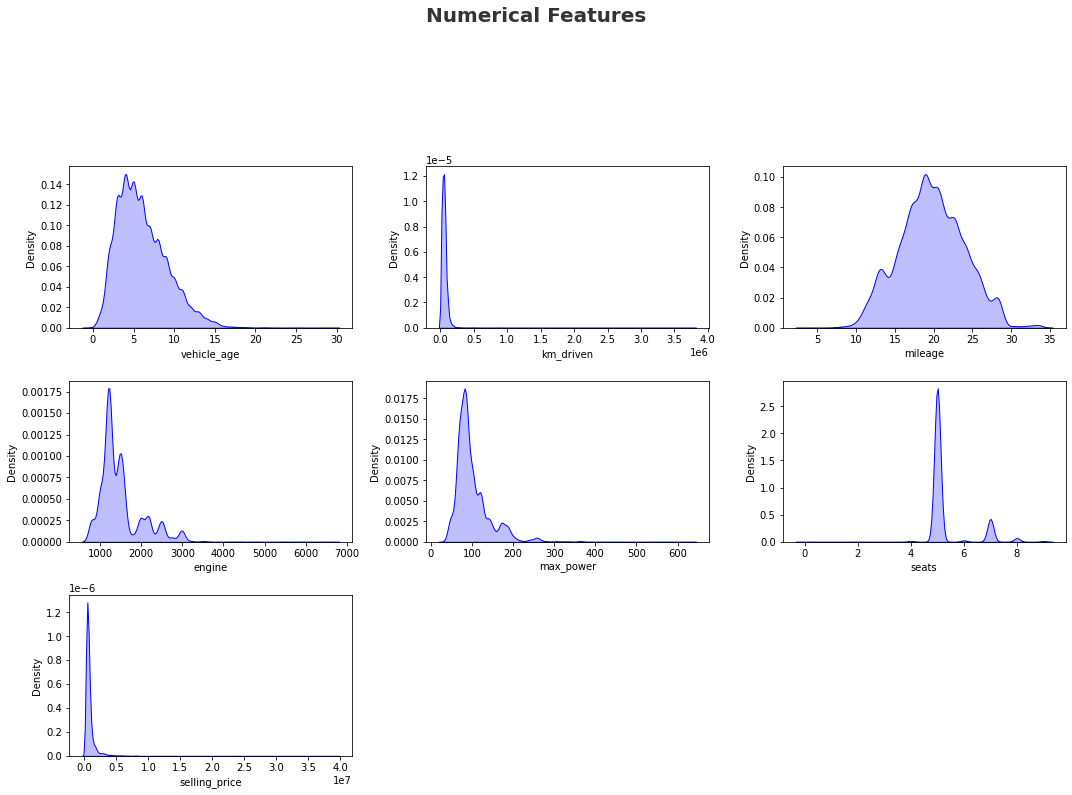

In [10]:
plt.figure(figsize=(15,15))
plt.suptitle('Numerical Features', fontsize=20, fontweight='bold', alpha = 0.8, y = 1.1)

for i in range(0, len(numerical_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x=df[numerical_features[i]], shade=True, color = 'b')
  plt.xlabel(numerical_features[i])
  plt.tight_layout()

### Categorical Features

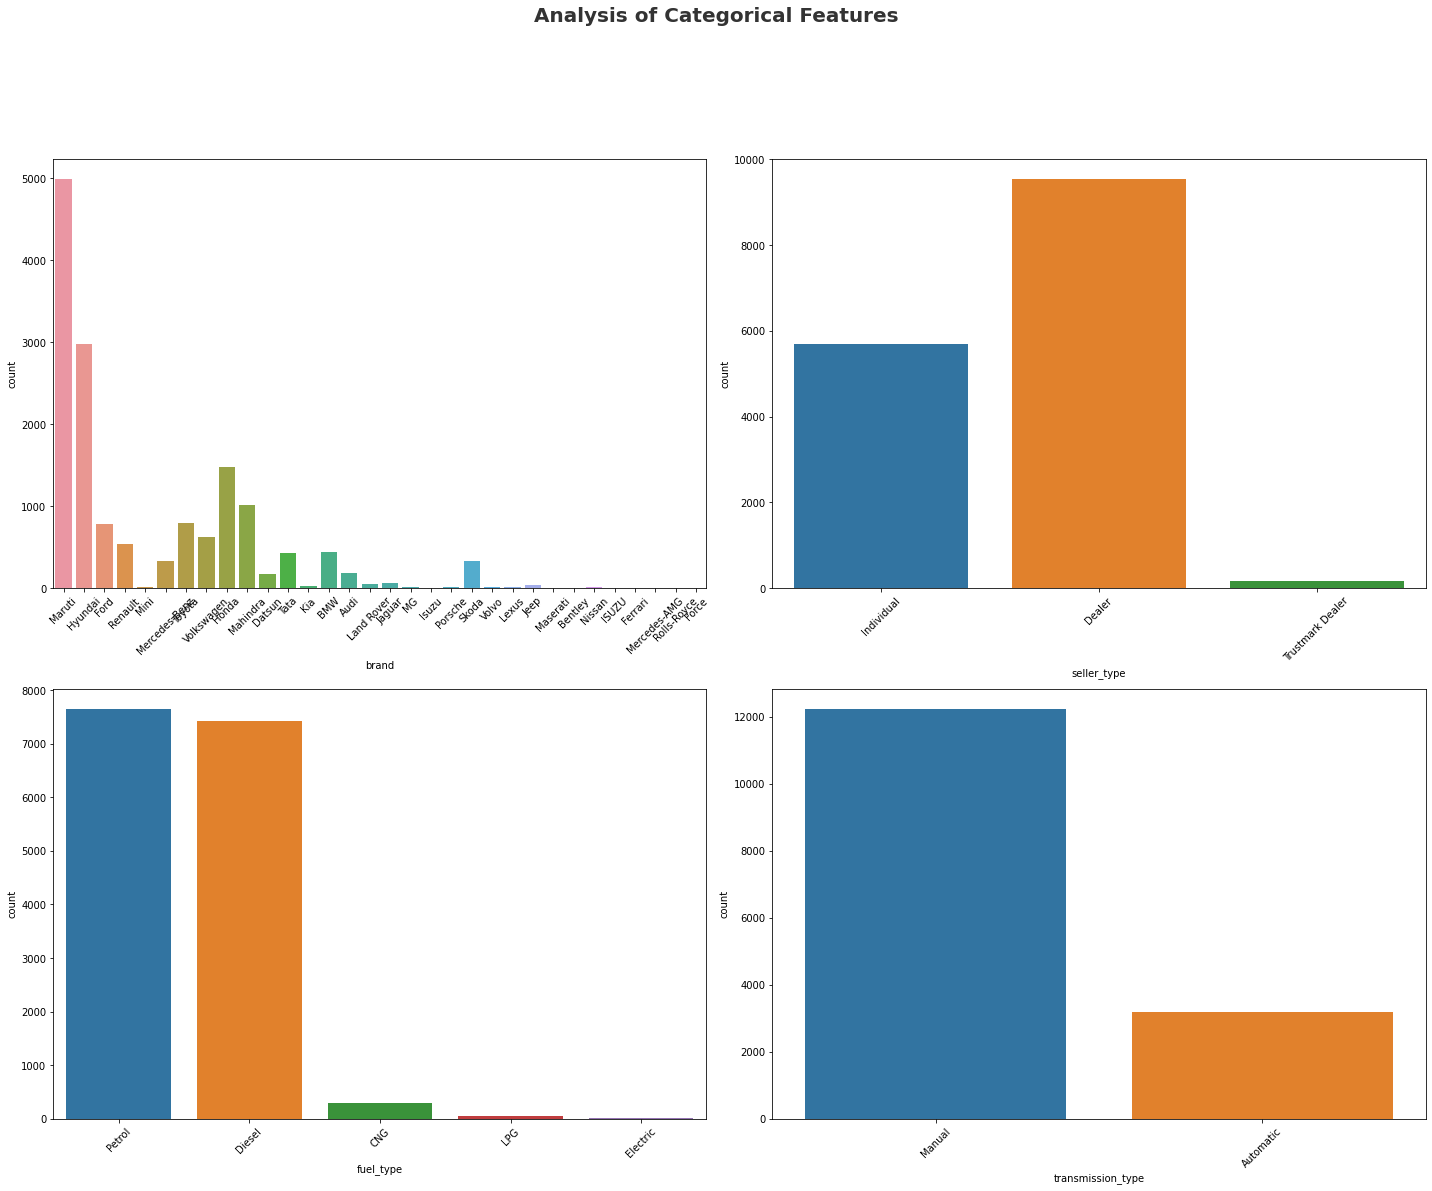

In [11]:
plt.figure(figsize=(20,15))
plt.suptitle("Analysis of Categorical Features", fontsize=20, fontweight = 'bold', alpha=0.8, y = 1.1 )
cat1 = ['brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=df[cat1[i]])
  plt.xlabel(cat1[i])
  plt.xticks(rotation=45)
  plt.tight_layout()


### Check Multi Collinearity in Numerical Features

In [12]:
df[numerical_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


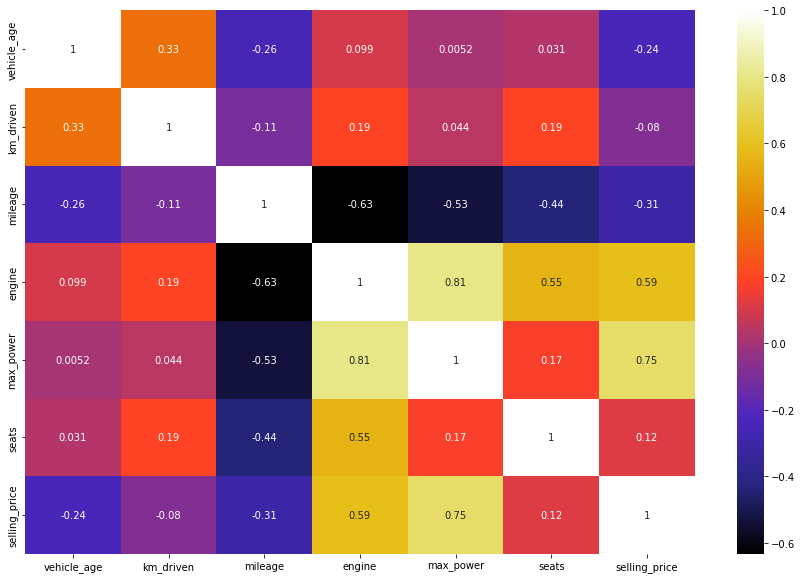

In [13]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

### Continuous Features

In [14]:
continuous_features = [feature for feature in numerical_features if len(df[feature].unique())>=10]
print("Number of Continuous Features: ",continuous_features)

Number of Continuous Features:  ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


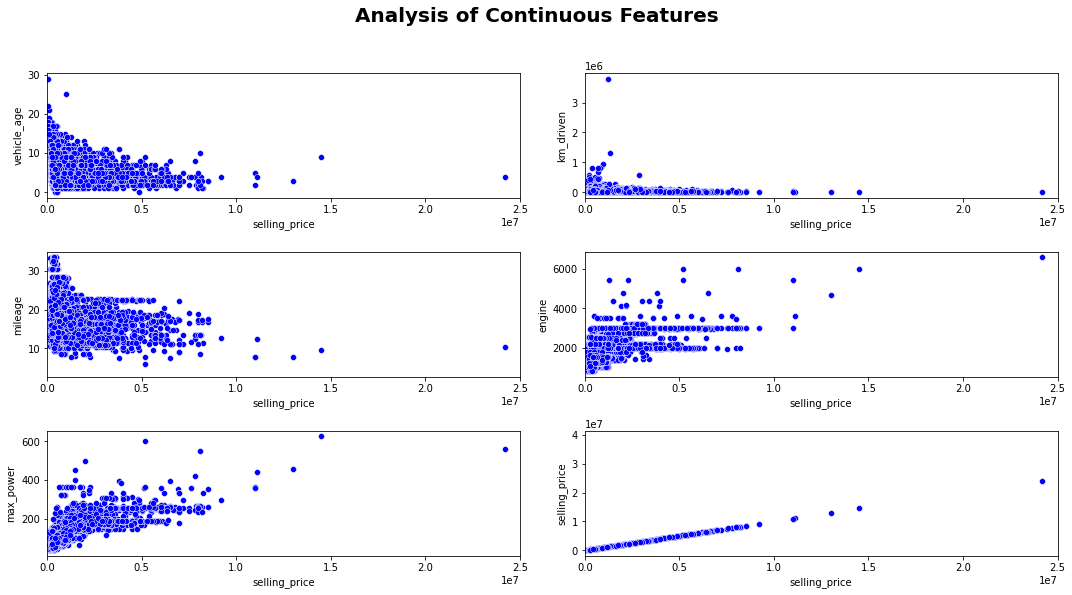

In [15]:
plt.figure(figsize=(15,20))
plt.suptitle("Analysis of Continuous Features", fontsize=20, fontweight='bold', y=1.01)

for i in range(0, len(continuous_features)):
  plt.subplot(8,2,i+1)
  sns.scatterplot(data=df, x='selling_price', y=continuous_features[i],color='b')
  plt.xlim(0,25000000)
  plt.tight_layout()


#### Analysis Report
* Lower Vehicle Age has more selling price than vehicle with more age.
* Engine CC has positive effect on price, Vehicle with 2000 CC and below are mostly priced below 5 lacs.
* kms driven has negative effect on selling price.

## 4. Visualization

### 4.1 Visualize the target feature

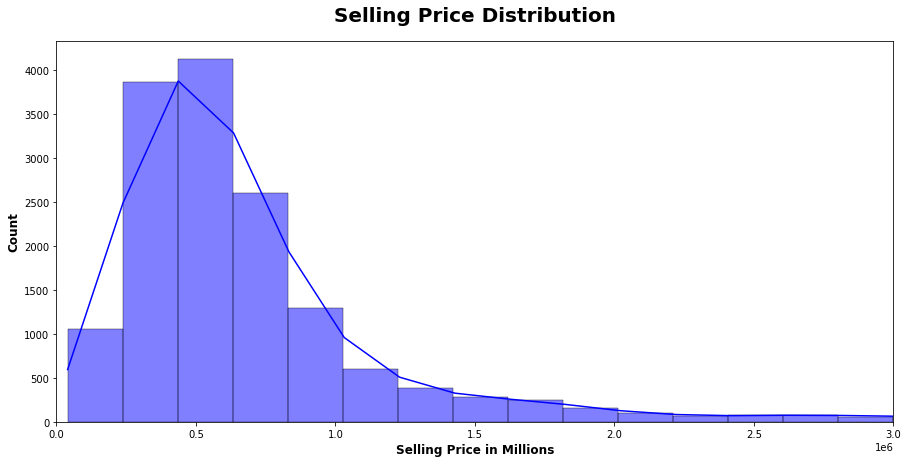

In [53]:
plt.subplots(figsize=(15,7))
sns.histplot(df.selling_price, bins=200, kde = True, color='b')
plt.title("Selling Price Distribution", fontsize=20, weight='bold', pad=20)
plt.ylabel('Count',fontsize=12, weight='bold')
plt.xlabel('Selling Price in Millions', fontsize=12, weight='bold')
plt.xlim(0,3000000)
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/selling_price_distribution.png')

### 4.2 Most Selling Used Car

In [17]:
df.car_name.value_counts()[0:10]

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

##### Most Selling Used Car is Hyundai i20

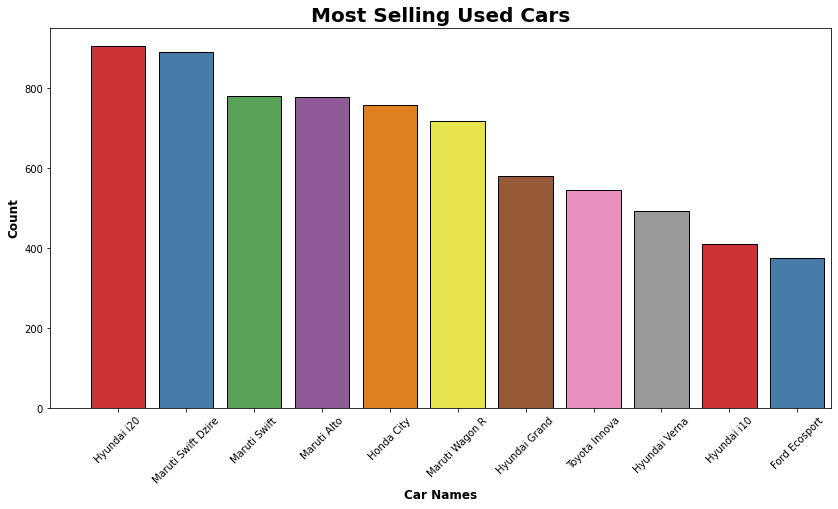

In [51]:
plt.subplots(figsize=(14,7))
sns.countplot(x='car_name', data=df, ec = "black",palette="Set1",order = df['car_name'].value_counts().index)
plt.title("Most Selling Used Cars", fontsize=20, weight='bold')
plt.ylabel('Count', fontsize=12, weight='bold')
plt.xlabel('Car Names', fontsize=12, weight='bold')
plt.xlim(-1,10.5)
plt.xticks(rotation=45)
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/most_selling_used_cars.png')

In [19]:
i20 = df[df['car_name']=='Hyundai i20']['selling_price'].mean()
print(f'Mean price of Hyundai i20 is {i20:.2f} Rupees')

Mean price of Hyundai i20 is 543603.75 Rupees


##### **Report**
* As per the Chart these are top 10 most selling cars in used car website.
* Mean Price of Most Sold Car is 5.4 lakhs.
* This Feature has impact on the Target Variable.

### 4.3 Most Selling Brand

In [20]:
df.brand.value_counts()

Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: brand, dtype: int64

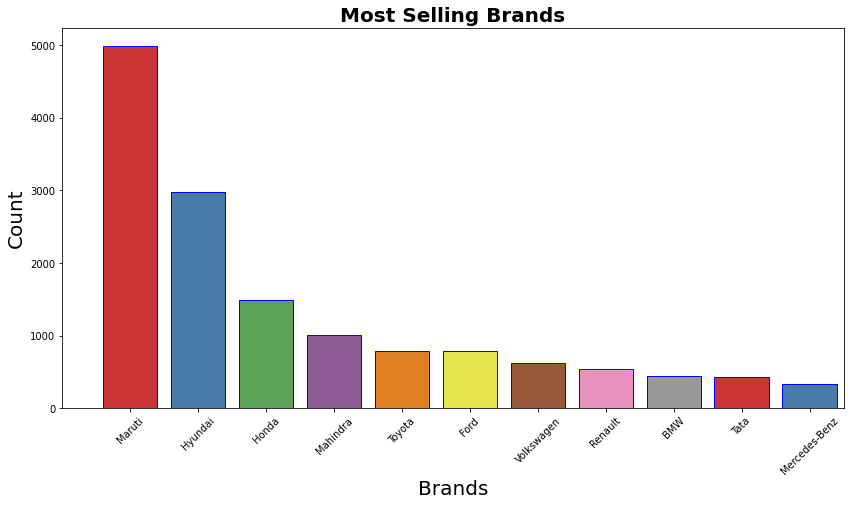

In [54]:
plt.subplots(figsize=(14,7))
sns.countplot(x='brand', data=df, ec = "blue",palette="Set1",order = df['brand'].value_counts().index)
plt.title("Most Selling Brands", fontsize=20, weight='bold')
plt.ylabel('Count', fontsize=20)
plt.xlabel('Brands', fontsize=20)
plt.xticks(rotation=45)
plt.xlim(-1,10.5)
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/most_selling_brands.png')

In [22]:
# Checking average price of Maruti Brand
maruti = df[df['brand']=='Maruti']['selling_price'].mean()
print(f'Mean price of Maruti is {maruti:.2f} rupees')

Mean price of Maruti is 487089.32 rupees


#### **Report**
* As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.
* Following Maruti we have Hyundai and Honda.
* Mean Price of Maruti Brand is 4.8 lakhs.

### 4.4 Costliest Brand and Costiest Car

##### Costliest Brand

In [23]:
brand = df.groupby('brand').selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price', ascending=False)
brand_df


,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


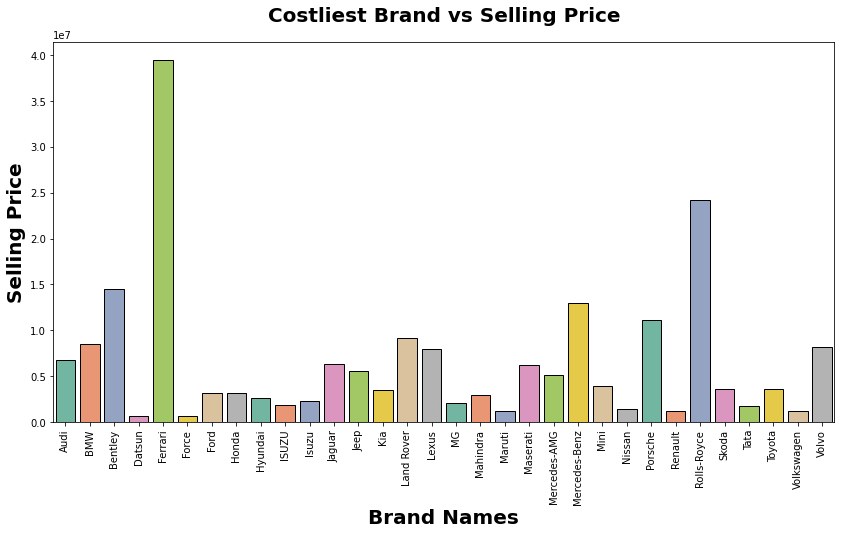

In [55]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.values, ec = 'black', palette='Set2')
plt.title("Costliest Brand vs Selling Price", fontsize=20, weight='bold', pad=20)
plt.xlabel('Brand Names', fontsize=20, weight = 'bold')
plt.ylabel('Selling Price', fontsize=20, weight = 'bold')
plt.xticks(rotation=90)
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/costliest_brand_vs_selling_price.png')

#### **Report**
* Costliest Brand sold is Ferrari at 3.95 Crores.
* Second most costliest car Brand is Rolls-Royce as 2.42 Crores.
* Brand name has very clear impact on selling price.

##### Costliest Car

In [25]:
car = df.groupby('car_name').selling_price.max()
car = car.to_frame().sort_values('selling_price',ascending=False)[0:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


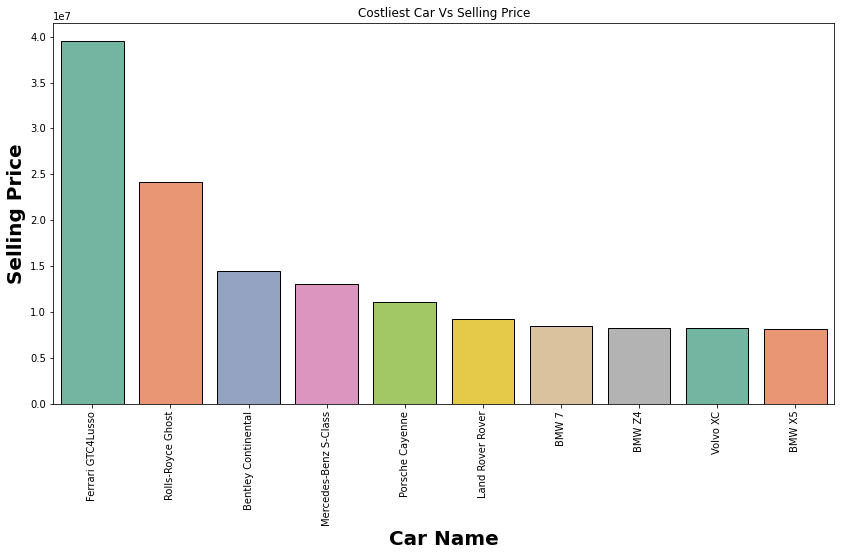

In [56]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index , y=car.selling_price , ec = 'black', palette='Set2')
plt.title('Costliest Car Vs Selling Price')
plt.xlabel('Car Name', fontsize=20, weight='bold')
plt.ylabel('Selling Price', fontsize=20, weight='bold')
plt.xticks(rotation=90)
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/costliest_car_vs_selling_price.png')

#### **Report**
* Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
* Ferrari selling price is 3.95 Crs.
* Other than Ferrari other car has priced below 1.5cr

### 4.5 Most Mileage Brand and Car Name

In [27]:
mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(10)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


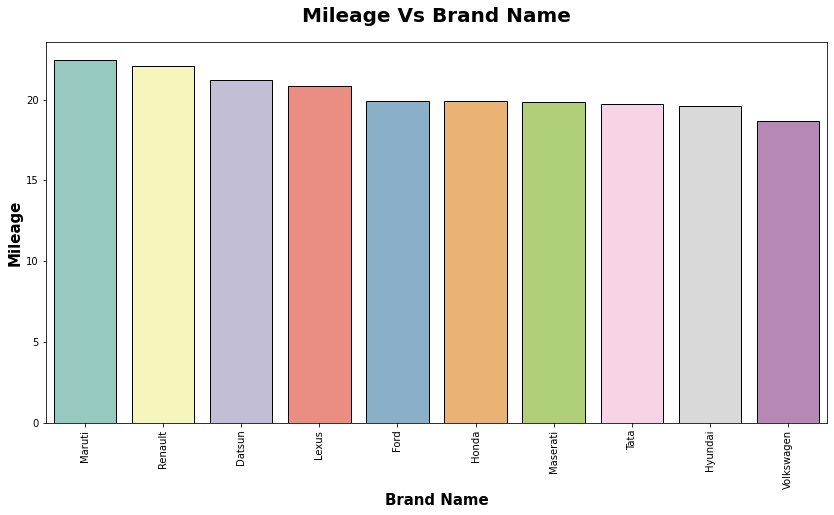

In [57]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, data = df, ec='black', palette='Set3')
plt.title('Mileage Vs Brand Name', fontsize=20,weight='bold', pad=20)
plt.xlabel('Brand Name', fontsize=15, weight='bold')
plt.ylabel('Mileage', fontsize=15, weight='bold')
plt.xticks(rotation=90)
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/mileage_vs_brand_name.png')

##### Car With Highest Mileage

In [29]:
car_mileage = df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
car_mileage.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


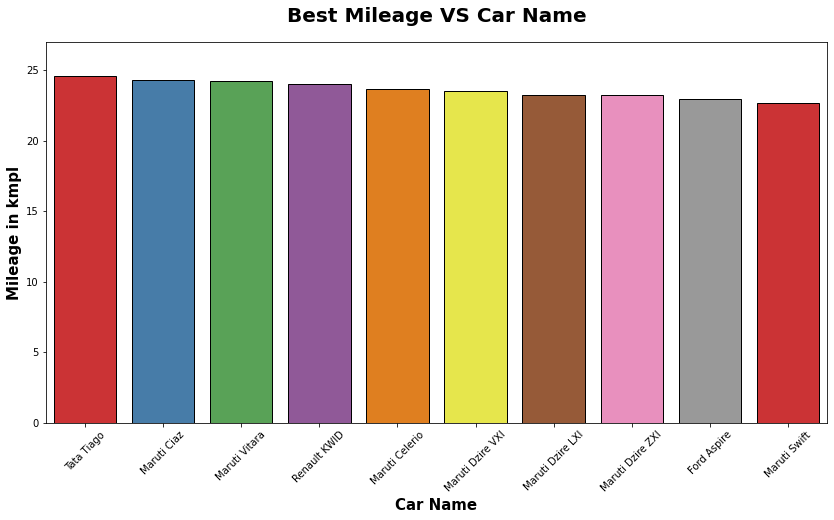

In [58]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car_mileage.index, y = car_mileage.values , ec = 'black', palette='Set1')
plt.title('Best Mileage VS Car Name', fontsize=20, weight='bold', pad=20)
plt.xlabel('Car Name', fontsize=15, weight = 'bold')
plt.ylabel('Mileage in kmpl', fontsize=15, weight = 'bold')
plt.ylim(0,27)
plt.xticks(rotation=45)
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/best_mileage_vs_car_name.png')

### 4.6 Kilometer Driven VS Selling Price

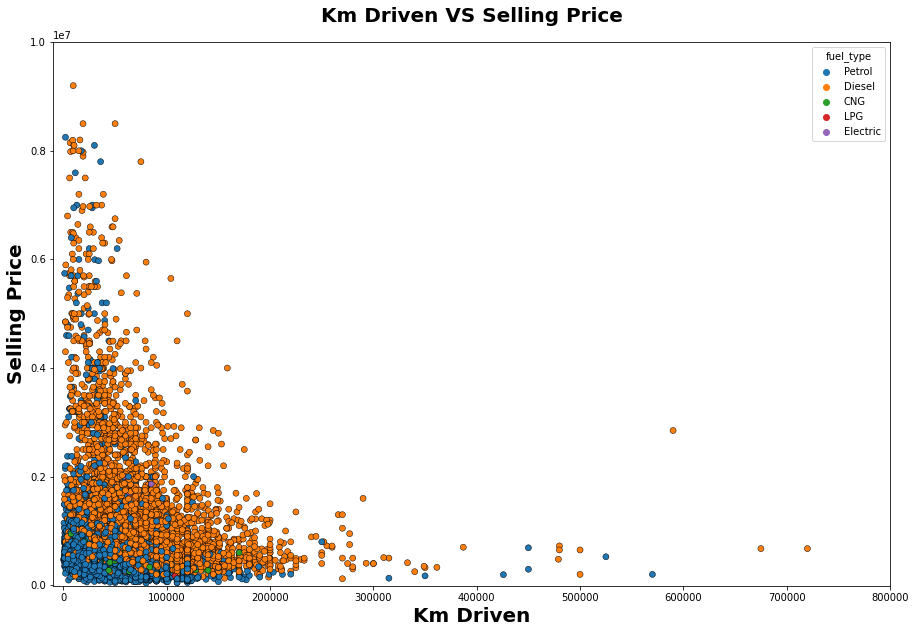

In [59]:
plt.subplots(figsize=(15,10))
sns.scatterplot(x='km_driven', y='selling_price', data = df, ec = 'black', color='b', hue='fuel_type')
plt.title("Km Driven VS Selling Price", fontsize=20, weight = 'bold', pad=20)
plt.xlabel('Km Driven',fontsize=20, weight = 'bold')
plt.ylabel('Selling Price',fontsize=20, weight = 'bold')
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/km_driven_vs_selling_price.png')

#### **Report**
* Many Cars were sold with kms between 0 to 20k Kilometers
* Low Kms driven cars had more selling price compared to cars which had more kms driven

### 4.7 Fuel Type Selling Price

In [32]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


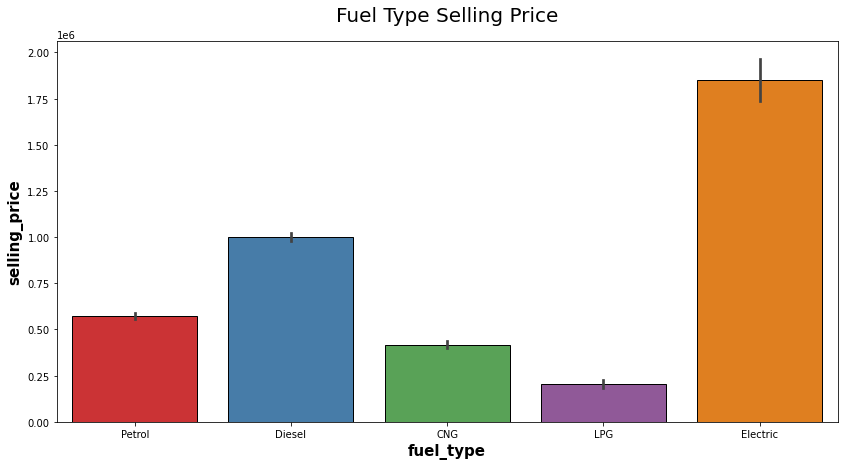

In [60]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df.fuel_type, y=df.selling_price, ec='black', palette='Set1')
plt.title('Fuel Type Selling Price', fontsize=20, pad=20)
plt.xlabel('fuel_type',fontsize=15, weight='bold')
plt.ylabel('selling_price',fontsize=15, weight='bold')
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/fuel_type_selling_price.png')

##### **Report**
* Electric cars have higher selling average price followed by Diesel and Petrol.
* Fuel Type is also important feature for the Target variable.

#### Most sold Fuel Type

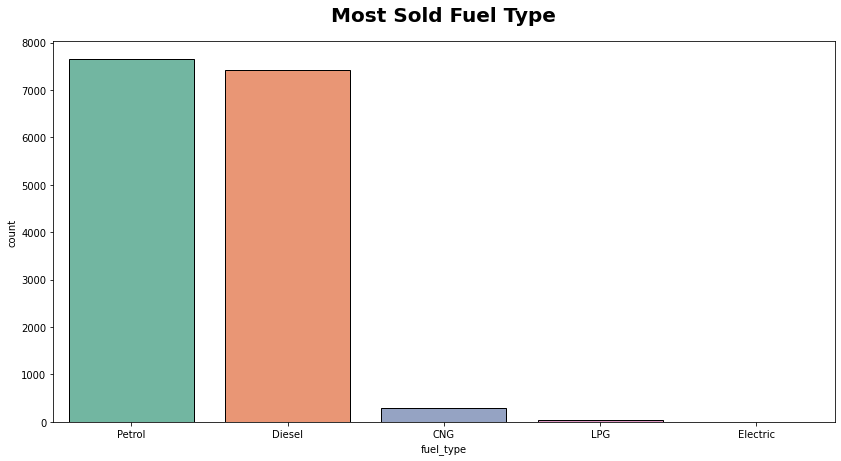

In [61]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel_type, data=df, ec = 'black', palette='Set2')
plt.title("Most Sold Fuel Type", fontsize=20, weight='bold', pad=20)
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/most_sold_fuel_type.png')

##### **Report**
* Petrol and Diesel dominate the used car market in the website.
* The most sold fuel type Vechicle is Petrol Followed by diesel and CNG and least sold is Electric

### 4.8 Fuel Type VS Mileage

In [35]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


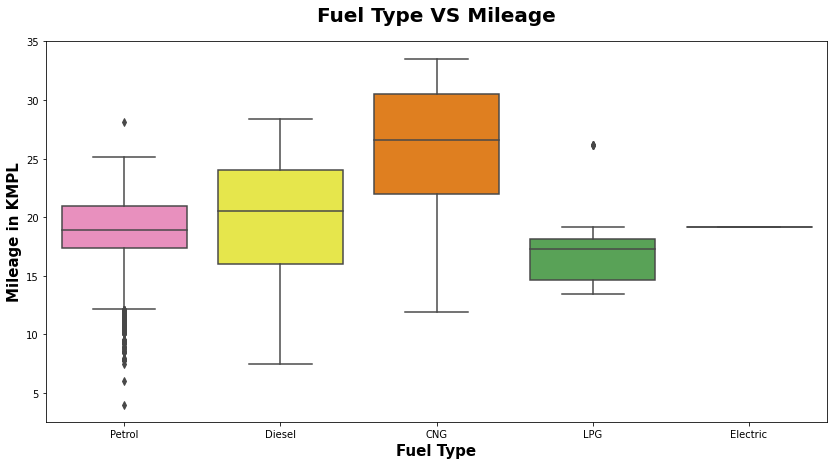

In [62]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type' , y ='mileage',data=df, palette='Set1_r')
plt.title("Fuel Type VS Mileage", fontsize=20, weight='bold', pad=20)
plt.xlabel("Fuel Type", fontsize=15, weight='bold')
plt.ylabel("Mileage in KMPL", fontsize=15, weight='bold')
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/fuel_type_vs_mileage_boxplot.png')

### 4.9 Mileage VS Selling Price

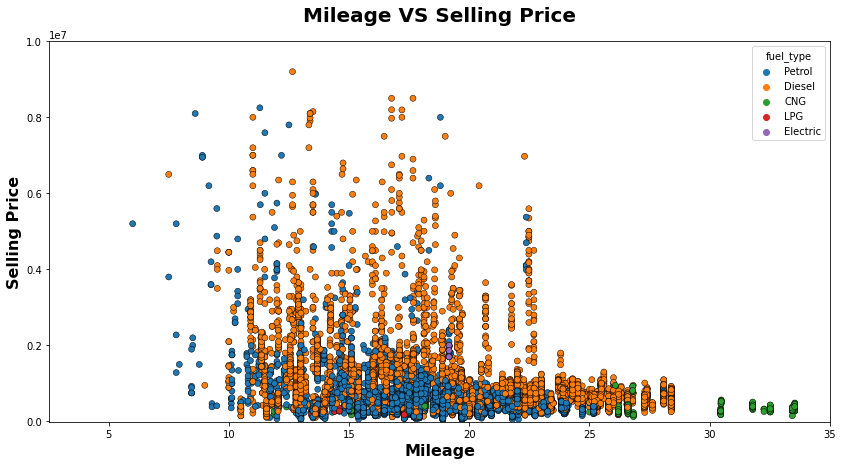

In [63]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x='mileage',y='selling_price', data=df, ec='black', hue='fuel_type')
plt.ylim(-10000,10000000)
plt.title("Mileage VS Selling Price", fontsize=20, pad=20, weight='bold')
plt.ylabel("Selling Price", weight="bold", fontsize=16)
plt.xlabel("Mileage", weight="bold", fontsize=16)
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/mileage_vs_selling_price.png')

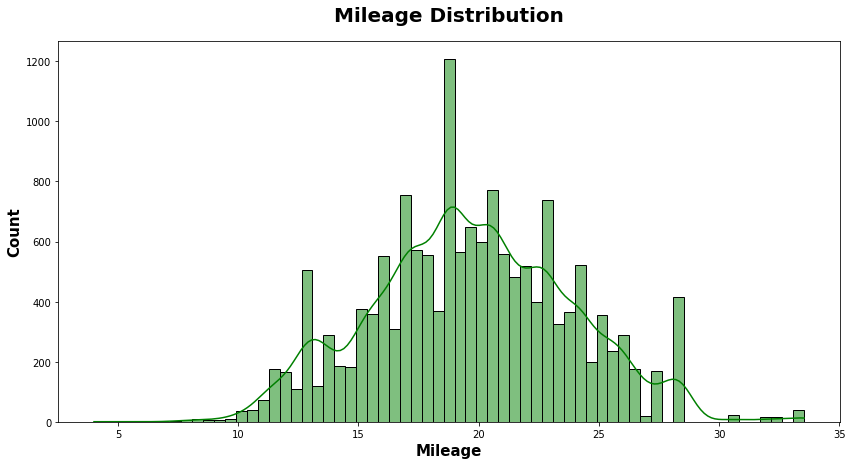

In [64]:
plt.subplots(figsize=(14,7))
sns.histplot(x='mileage', data=df, ec = 'black', color='g', kde=True)
plt.title('Mileage Distribution', fontsize=20, pad=20, weight = 'bold')
plt.xlabel('Mileage', fontsize=15, weight='bold')
plt.ylabel('Count', fontsize=15, weight='bold')
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/mileage_distribution.png')

### 4.10 Vehicle Age VS Selling Price

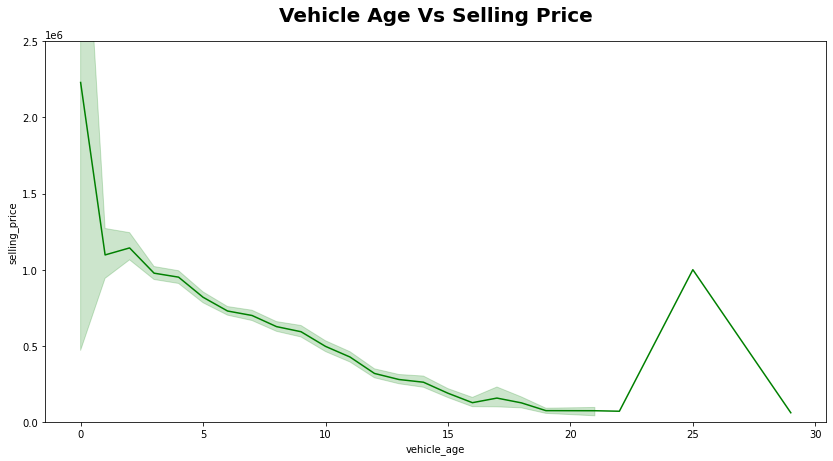

In [65]:
plt.subplots(figsize=(14,7))
sns.lineplot(x='vehicle_age', y='selling_price', data=df, color='g')
plt.title("Vehicle Age Vs Selling Price", fontsize=20, weight='bold', pad=20)
plt.ylim(0,2500000)
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/vehicle_age_vs_selling_price.png')

##### **Report**
* As the Vehicle age increases the price also get reduced.
* Vehicle age has Negative impact on selling price

### 4.11 Vehicle Age VS Mileage

In [40]:
vehicle_mileage = df.groupby('vehicle_age')['mileage'].mean().sort_values(ascending=False)
vehicle_mileage.to_frame().head(7)

,mileage
vehicle_age,
29,22.050000
0,21.140000
3,20.858640
5,20.633798
4,20.524369
6,20.242282
2,19.900253


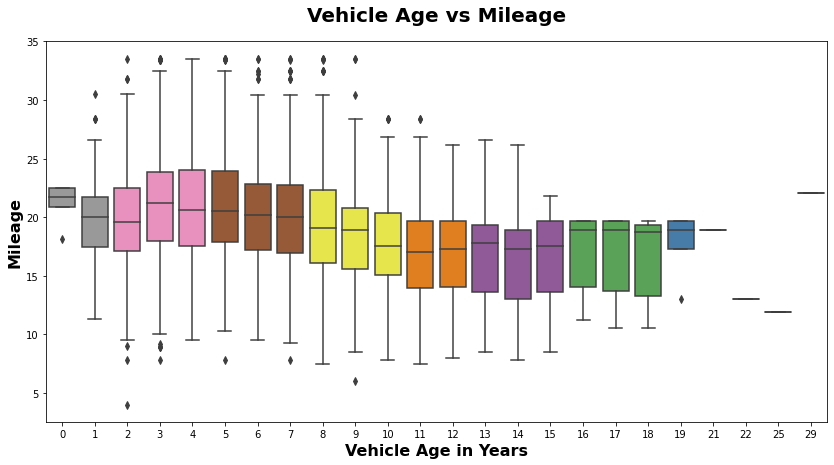

In [41]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='vehicle_age', y='mileage', data = df, palette='Set1_r')
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=16)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

##### **Report**
* As the Age of vehicle increases the median of mileage drops.
* Newer Vehicles have more mileage than older vehicle.

In [42]:
oldest = df.groupby('car_name')['vehicle_age'].max().sort_values(ascending=False)
oldest.to_frame().head(7)

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
Mahindra Scorpio,18
Skoda Octavia,18


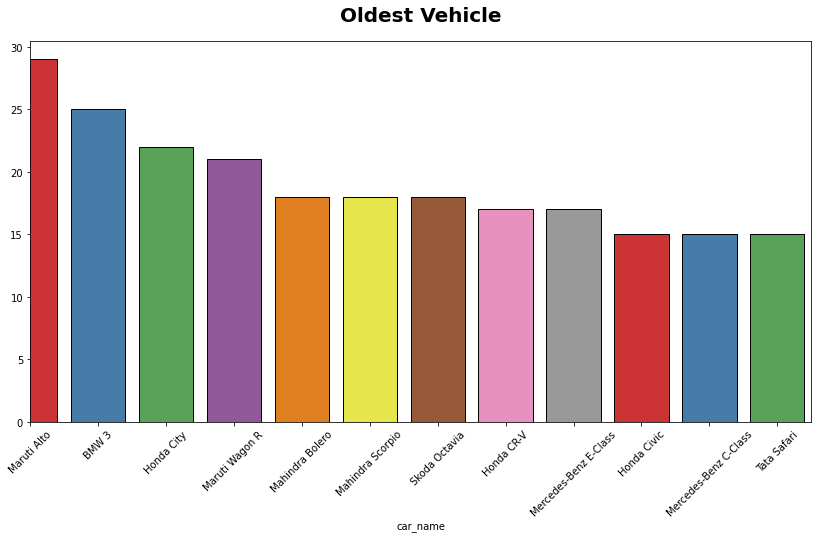

In [66]:
plt.subplots(figsize=(14,7))
sns.barplot(x=oldest.index, y=oldest.values, ec='black', palette='Set1')
plt.title('Oldest Vehicle', fontsize=20, pad=20, weight='bold')
plt.xlim(0,11.5)
plt.xticks(rotation=45)
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/oldest_vehicle.png')

##### **Report**
* Maruti Alto is the Oldest car available 29 years old in the used car website followed by BMW 3 for 25 years old.

### 4.12 Transmission Type

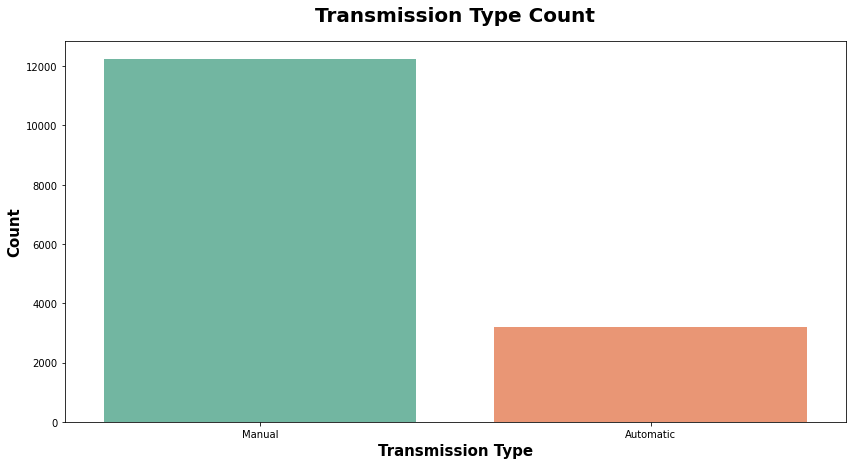

In [67]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type', data = df, palette='Set2')
plt.title("Transmission Type Count", fontsize=20, weight='bold', pad=20)
plt.xlabel('Transmission Type', fontsize=15, weight = 'bold')
plt.ylabel('Count', fontsize=15, weight = 'bold')
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/transmission_type_count.png')

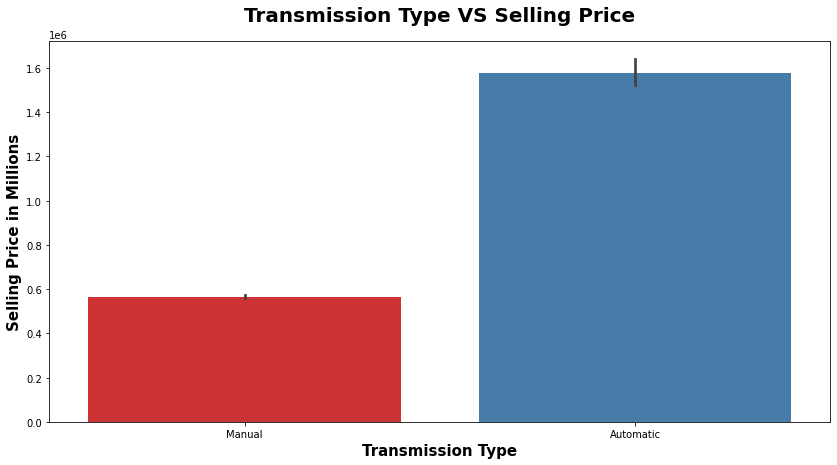

In [68]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type', y='selling_price', data = df, palette='Set1')
plt.title("Transmission Type VS Selling Price", fontsize=20, weight='bold', pad=20)
plt.xlabel('Transmission Type', fontsize=15, weight = 'bold')
plt.ylabel('Selling Price in Millions', fontsize=15, weight = 'bold')
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/transmission_type_vs_selling_price.png')

### 4.13 Seller Type

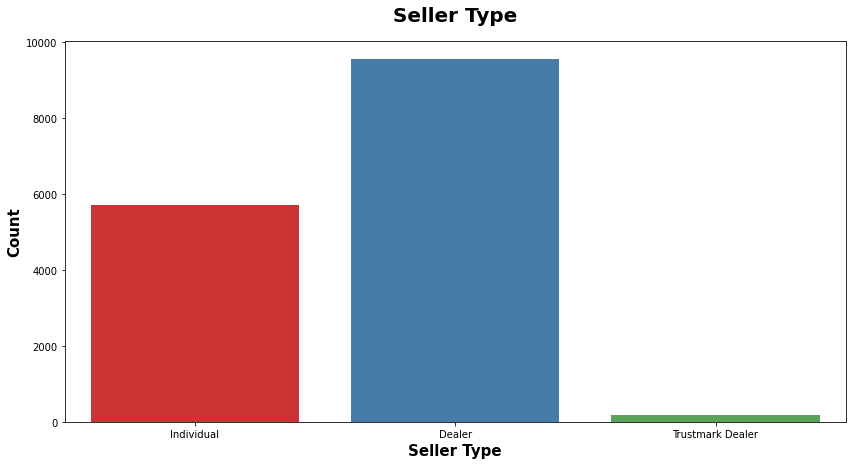

In [69]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data = df, palette='Set1')
plt.title("Seller Type", fontsize=20, weight='bold', pad=20)
plt.xlabel('Seller Type', fontsize=15, weight = 'bold')
plt.ylabel('Count', fontsize=15, weight = 'bold')
# plt.show()
plt.savefig('E:/Study Material/Data Science Project (Completed)/Car Dekho Used Car Predictions/Car-Dekho-Used-Car-Prediction/images/seller_type.png')

In [47]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


##### **Report**
* Dealers have put more ads on used car website.
* Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
* Dealers have more median selling price than Individual.

## 5. Final Report

* The datatypes and Column names were right and there was 15411 rows and 13 columns
* The `selling_price` column is the target to predict. i.e Regression Problem.
* Dealers are the highest sellers of the used cars.
* Vehicle age has negative impact on the price.
* Manual cars are mostly sold and automatic has higher selling average than manual cars.
* Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
* We just need less data cleaning for this dataset.